## Imports

In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Cleaning 

In [3]:
# check for null values
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [4]:
# check for zeros
df.eq(0).sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [8]:
# replace 0 values with NaN values
df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']] = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].replace(0, np.NaN)

df.fillna(df.mean(), inplace=True)

In [10]:
# verify no 0 values
df.eq(0).sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Correlation

In [13]:
corr = df.corr()
print(corr)

                              Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.804607   
Score                            -0.989096  1.000000        0.797568   
GDP per capita                   -0.804607  0.797568        1.000000   
Social support                   -0.764704  0.763901        0.722338   
Healthy life expectancy          -0.786335  0.782126        0.841398   
Freedom to make life choices     -0.529952  0.544963        0.387096   
Generosity                       -0.047602  0.075392       -0.063970   
Perceptions of corruption        -0.354800  0.388174        0.326431   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.764704                -0.786335   
Score                               0.763901                 0.782126   
GDP per capita                      0.722338                 0.841398   
Social support                      1.000000               

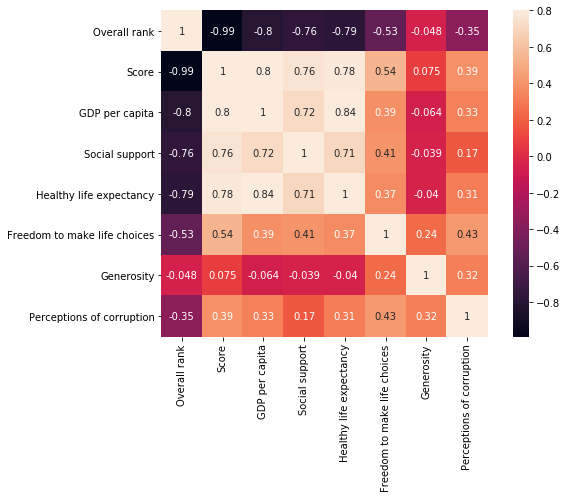

In [19]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()

In [27]:
df.corr().nlargest(4, 'Overall rank')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.804607,-0.764704,-0.786335,-0.529952,-0.047602,-0.354800
Generosity,-0.047602,0.075392,-0.063970,-0.039476,-0.039792,0.244855,1.000000,0.321291
Perceptions of corruption,-0.354800,0.388174,0.326431,0.173958,0.311131,0.427173,0.321291,1.000000
Freedom to make life choices,-0.529952,0.544963,0.387096,0.406701,0.372416,1.000000,0.244855,0.427173
